In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')  

In [3]:
df.head()

,Unnamed: 0,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,1,0,4.1,787,1,20,594,800.0,5047
2,2,1,0,3.8,918,1,16,484,800.0,5047
3,3,0,0,3.7,88,1,62,1587,300.0,5047
4,4,0,0,3.8,166,4,20,1406,600.0,5047


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    23248 non-null  int64  
 1   online_order  23248 non-null  int64  
 2   book_table    23248 non-null  int64  
 3   rate          23248 non-null  float64
 4   votes         23248 non-null  int64  
 5   location      23248 non-null  int64  
 6   rest_type     23248 non-null  int64  
 7   cuisines      23248 non-null  int64  
 8   cost          23248 non-null  float64
 9   menu_item     23248 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.8 MB


In [5]:
df.shape

(23248, 10)

In [6]:
df.columns

Index(['Unnamed: 0', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'menu_item'],
      dtype='object')

In [7]:
df = df.drop('Unnamed: 0',axis=1)

In [8]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,0,4.1,787,1,20,594,800.0,5047
2,1,0,3.8,918,1,16,484,800.0,5047
3,0,0,3.7,88,1,62,1587,300.0,5047
4,0,0,3.8,166,4,20,1406,600.0,5047


In [9]:
df.describe()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
count,23248.000000,23248.000000,23248.000000,23248.000000,23248.000000,23248.000000,23248.000000,23248.000000,23248.000000
mean,0.704491,0.260539,3.905781,605.461674,35.525680,32.933672,862.081168,753.500946,4308.031487
std,0.456281,0.438938,0.426153,1113.706789,23.260984,20.506963,473.466781,520.472169,1394.280280
min,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
25%,0.000000,0.000000,3.800000,104.000000,19.000000,20.000000,429.000000,400.000000,4320.750000
50%,1.000000,0.000000,4.000000,225.000000,34.000000,21.000000,879.000000,600.000000,5047.000000
75%,1.000000,1.000000,4.200000,597.000000,49.000000,62.000000,1218.000000,1000.000000,5047.000000
max,1.000000,1.000000,4.900000,16832.000000,87.000000,72.000000,1680.000000,6000.000000,5047.000000


## Exploratory Data Analysis

In [10]:
idsUnique = len(set(df.rate))
idsTotal = df.shape[0]
Duplicate = idsTotal-idsUnique
print("Total Unique value Rates are ",Duplicate,"From ",df.rate.shape[0])
print("Tatoal ")

Total Unique value Rates are  23217 From  23248
Tatoal 


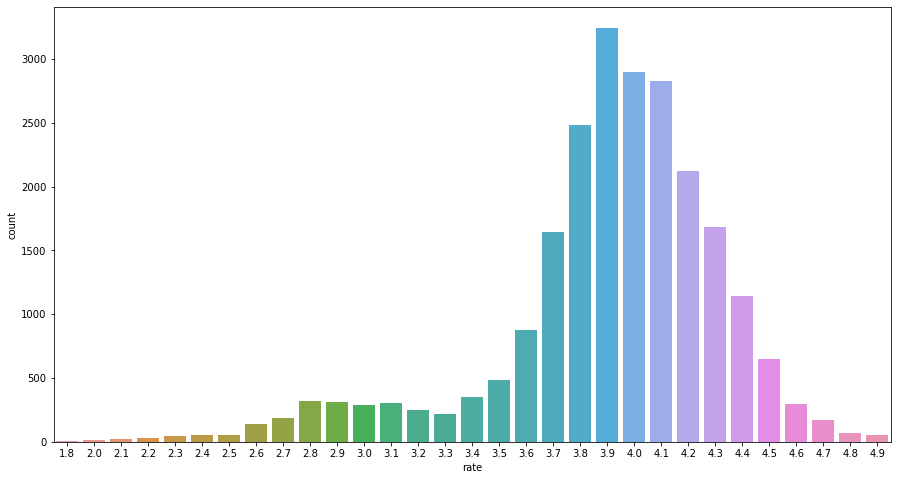

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(df['rate'])

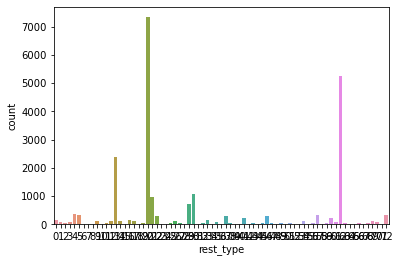

In [12]:

sns.countplot(df['rest_type'])

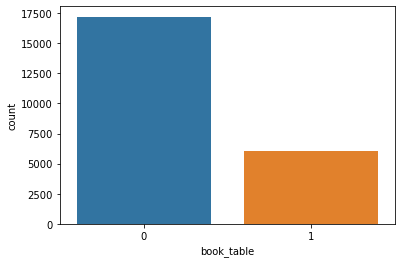

In [13]:

sns.countplot(df['book_table'])

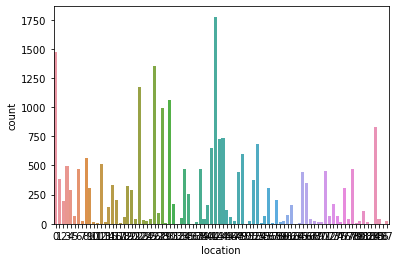

In [14]:
sns.countplot(df['location'])

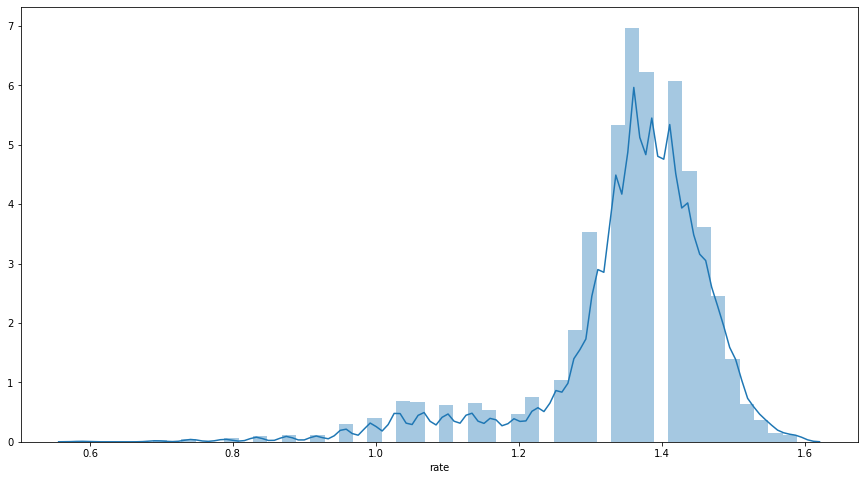

In [15]:
plt.figure(figsize=(15,8))
sns.distplot(np.log(df["rate"]))

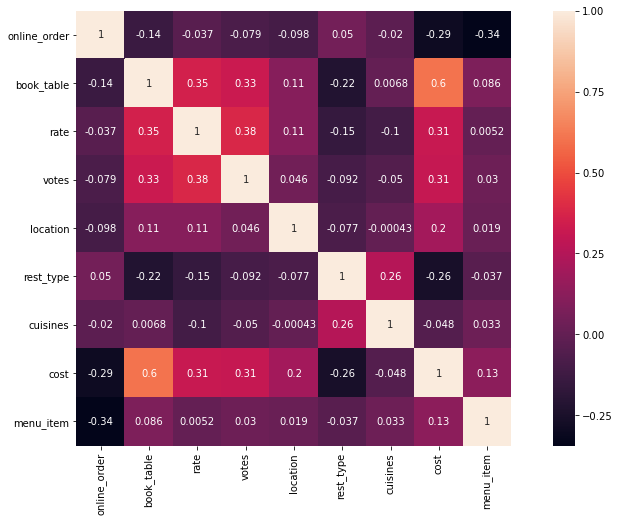

In [16]:
plt.figure(figsize=(15,8))
corr = df.corr()
#correlation matrix
sns.heatmap(corr,square=True,annot=True);

In [18]:
X = df.drop("rate",axis=1)
y = df['rate']

In [19]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64>

In [20]:
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [21]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 41)

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
pred = reg.predict(X_test).round(1)

## LGBM

In [45]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV
params={ "n_estimators" : [100,300,500,1000,1500],
       "learning_rate": [0.01,0.02,0.05,0.08],
       "reg_alpha":[1,2,3,5,10]}

classifier=LGBMRegressor(random_state=45)

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter
=5,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,y)

print('Best rmse: {:.4}, with best C: {}'.format(random_search.best_score_, random_search.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   33.7s finished


Best rmse: -0.1914, with best C: {'reg_alpha': 1, 'n_estimators': 1500, 'learning_rate': 0.05}


In [46]:
params = random_search.best_params_
lgb =  LGBMRegressor(**params,random_state=45)
lgb.fit(X,y)

y_test_pred_lgb = lgb.predict(X_test)
print("RMSE : " , np.sqrt(mean_squared_error(y_test,y_test_pred_lgb)))

RMSE :  0.11868519154043906


In [47]:
y_pred_lb = lgb.predict(X_train)
score = r2_score(y_train,y_pred_lb)
print("Score of Training:",100*score)

Score of Training: 92.3422327649113


In [48]:
y_test_pred_lr = lgb.predict(X_test)
#r2 Score
score = r2_score(y_test,y_test_pred_lr)
print("Score of Testing:",100*score)
#RMSE
print("RMSE : " , np.sqrt(mean_squared_error(y_test,y_test_pred_lr)))
#MAE
print("Mean Absolute Error",mean_absolute_error(y_test,y_test_pred_lr))

Score of Testing: 92.25282763041801
RMSE :  0.11868519154043906
Mean Absolute Error 0.07656172507037519


In [35]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#Predicting the Test set results
y_pred_lr = reg.predict(X_train)
score = r2_score(y_train,y_pred_lr)
print("Score of Training:",100*score)
print("RMSE :" , np.sqrt(mean_squared_error(y_train,y_pred_lr)))

Score of Training: 22.550465784858964
RMSE : 0.37495894753476533


In [36]:
y_test_pred_lr = reg.predict(X_test)
#r2 Score
score = r2_score(y_test,y_test_pred_lr)
print("Score of Testing:",100*score)
#RMSE
print("RMSE : " , np.sqrt(mean_squared_error(y_test,y_test_pred_lr)))
#MAE
print("Mean Absolute Error",mean_absolute_error(y_test,y_test_pred_lr))

Score of Testing: 22.755247122807287
RMSE :  0.37476534095040703
Mean Absolute Error 0.26748105354342616


In [25]:
pred[0]

4.0

In [49]:
usr_inp = [[1,1,775,1,20,1389,800.0,5047]]
usr_inp = scalar.transform(usr_inp)

In [50]:
output = lgb.predict(usr_inp)
output[0]

4.056392995851896

In [51]:
import pickle
filename = 'zomato_linear.pkl'
pickle.dump(reg, open(filename, 'wb'))

In [52]:
model = open("zomato_linear.pkl","rb")
model = pickle.load(model)

In [53]:
usr_inp = [[1,1,775,1,20,1389,800.0,5047]]
usr_inp = scalar.transform(usr_inp)

In [54]:
output = model.predict(usr_inp)
output[0]

4.011634151084964